In [1]:
from importlib import reload
import time
import joblib
from pylab import *
from tqdm import tqdm


import sys
sys.path.append("..")

from helper_basic import *
import helper_basic as hp
import helper_finetime as hpt
import helper_visa as vs
reload(vs)



<module 'helper_visa' from '/home/mathusla/tofpet/Mu-Hardware/Keysight/../helper_visa.py'>

# Step 1: connect to the scope
- If you don't know the address, do vs.connect()
- Otherwise, put the address in the argument will speed it up

In [2]:
scope = vs.connect(address = "USB0::0x2A8D::0x9008::MY63160110::0::INSTR", timeout=30_000) # set 30 second

Connected to VISA [USB0::0x2A8D::0x9008::MY63160110::0::INSTR]:  KEYSIGHT TECHNOLOGIES,EXR054A,MY63160110,11.50.00201



# Example 1: read the current waveform from the scope

- For simplicity of the code and better readout speed, please configure the trigger threshold and channel setup on the scope

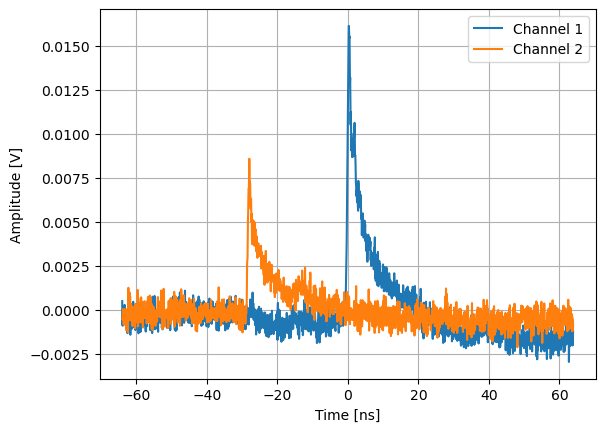

In [5]:
trigger_channel = 1
read_channel = [1,2]
acquire_length = 2048

# data,time_series=read_waveform_cuts(scope, trigger_channel = trigger_channel, read_channel = read_channel, acquire_length = acquire_length, calibrate = True, initialize = True, calibration_data=None)
data,time_series=vs.read_waveform(scope, trigger_channel = trigger_channel, read_channel = read_channel, acquire_length = acquire_length, calibrate = True, initialize = True, calibration_data=None)

for ch in data:
    plot(time_series*1e9, data[ch], label=f"Channel {ch}")

# xlim(-10,10)
xlabel("Time [ns]")
ylabel("Amplitude [V]")
legend()
grid()

# Example 2: repetitively read multiple waveforms from the scope

- For simplicity of the code and better readout speed, please configure the trigger threshold and channel setup on the scope

4/40 events acquired, time elapsed 0.9 s, time from last print 0.9 s
8/40 events acquired, time elapsed 3.0 s, time from last print 2.1 s
12/40 events acquired, time elapsed 4.4 s, time from last print 1.4 s
16/40 events acquired, time elapsed 6.4 s, time from last print 2.0 s
20/40 events acquired, time elapsed 7.8 s, time from last print 1.4 s
24/40 events acquired, time elapsed 9.8 s, time from last print 2.0 s
28/40 events acquired, time elapsed 12.1 s, time from last print 2.3 s
32/40 events acquired, time elapsed 16.1 s, time from last print 4.0 s
36/40 events acquired, time elapsed 17.1 s, time from last print 1.0 s
40/40 events acquired, time elapsed 20.0 s, time from last print 2.8 s


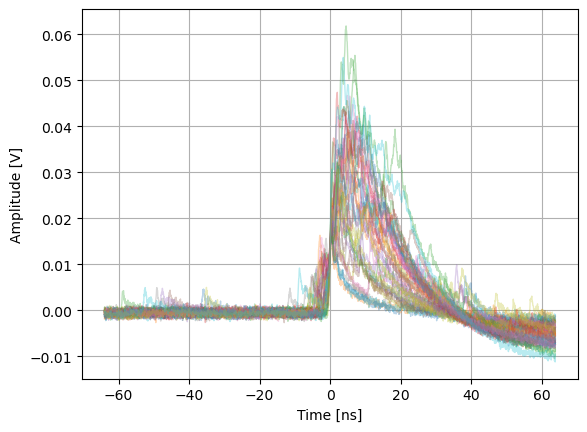

In [8]:
data_save = vs.get_events(scope, Nevents = 40, print_every_n = 4, trigger_channel = trigger_channel, read_channel = read_channel, acquire_length = acquire_length, calibrate = True)
# data_save = get_events_cuts(scope, Nevents = 40, print_every_n = 4, trigger_channel = trigger_channel, read_channel = read_channel, acquire_length = acquire_length, calibrate = True)
time_series = data_save["metadata"]["time_series"]*1e9

for i in range(len(data_save[1])):
    plot(time_series, data_save[1][i],alpha=0.3, linewidth=1)

# xlim(-10,10)
xlabel("Time [ns]")
ylabel("Amplitude [V]")
grid()

# Acquire the data

In [9]:
data_save = vs.get_events(scope, Nevents = 7200, print_every_n = 400, trigger_channel = trigger_channel, read_channel = read_channel, acquire_length = acquire_length, calibrate = True)
joblib.dump(data_save, "data_waveform/waveform_fiber_BCF92.joblib",compress =False) # Dark current on CH1 and CH2, threshold CH1=1 mV 0.5 eh


400/7200 events acquired, time elapsed 149.4 s, time from last print 149.4 s
800/7200 events acquired, time elapsed 313.4 s, time from last print 164.0 s
1200/7200 events acquired, time elapsed 467.9 s, time from last print 154.5 s
1600/7200 events acquired, time elapsed 628.3 s, time from last print 160.3 s
2000/7200 events acquired, time elapsed 793.7 s, time from last print 165.4 s
2400/7200 events acquired, time elapsed 950.2 s, time from last print 156.6 s
2800/7200 events acquired, time elapsed 1113.6 s, time from last print 163.4 s
3200/7200 events acquired, time elapsed 1272.8 s, time from last print 159.2 s
3600/7200 events acquired, time elapsed 1429.0 s, time from last print 156.2 s
4000/7200 events acquired, time elapsed 1595.8 s, time from last print 166.7 s
4400/7200 events acquired, time elapsed 1738.4 s, time from last print 142.6 s
4800/7200 events acquired, time elapsed 1895.7 s, time from last print 157.4 s
5200/7200 events acquired, time elapsed 2066.4 s, time from 

['data_waveform/waveform_fiber_BCF92.joblib']

In [5]:
# Calibration, dark current, low intensity
data_save = vs.get_events(scope, Nevents = 1200, print_every_n = 400, trigger_channel = trigger_channel, read_channel = read_channel, acquire_length = acquire_length, calibrate = True)
joblib.dump(data_save, "data_waveform/waveform_calib_CH1.joblib",compress =False) # Laser on CH2, TTL trigger on CH1, laser ~3 eh


400/1200 events acquired, time elapsed 6.8 s, time from last print 6.8 s
800/1200 events acquired, time elapsed 13.5 s, time from last print 6.7 s
1200/1200 events acquired, time elapsed 20.2 s, time from last print 6.7 s


['data_waveform/waveform_calib_CH1.joblib']

In [8]:
# Calibration, laser, high intensity
data_save = vs.get_events(scope, Nevents = 7200, print_every_n = 400, trigger_channel = trigger_channel, read_channel = read_channel, acquire_length = acquire_length, calibrate = True)
joblib.dump(data_save, "waveform_laser.joblib",compress =False) # Laser on CH2, TTL trigger on CH1, laser ~3 eh


400/7200 events acquired, time elapsed 10.4 s, time from last print 10.4 s
800/7200 events acquired, time elapsed 21.0 s, time from last print 10.7 s
1200/7200 events acquired, time elapsed 31.4 s, time from last print 10.4 s
1600/7200 events acquired, time elapsed 41.8 s, time from last print 10.3 s
2000/7200 events acquired, time elapsed 52.1 s, time from last print 10.3 s
2400/7200 events acquired, time elapsed 62.5 s, time from last print 10.4 s
2800/7200 events acquired, time elapsed 73.0 s, time from last print 10.5 s
3200/7200 events acquired, time elapsed 83.4 s, time from last print 10.4 s
3600/7200 events acquired, time elapsed 93.7 s, time from last print 10.3 s
4000/7200 events acquired, time elapsed 104.0 s, time from last print 10.3 s
4400/7200 events acquired, time elapsed 114.4 s, time from last print 10.4 s
4800/7200 events acquired, time elapsed 124.7 s, time from last print 10.4 s
5200/7200 events acquired, time elapsed 135.3 s, time from last print 10.6 s
5600/7200 

['waveform_laser.joblib']

In [7]:
# Ch1 CH2 coincidence
data_save = vs.get_events(scope, Nevents = 7200, print_every_n = 400, trigger_channel = trigger_channel, read_channel = read_channel, acquire_length = acquire_length, calibrate = True)
# joblib.dump(data_save, "muon_coinc_ch1_ch2.joblib",compress =False) # threshold CH1=20 mV ~8eh
# joblib.dump(data_save, "muon_coinc_ch1_ch2_coinc.joblib",compress =False) # threshold CH1=10 mV ~8eh && CH2=10 mV ~8eh

400/7200 events acquired, time elapsed 251.1 s, time from last print 251.1 s
800/7200 events acquired, time elapsed 508.3 s, time from last print 257.2 s
1200/7200 events acquired, time elapsed 771.9 s, time from last print 263.6 s
1600/7200 events acquired, time elapsed 1026.7 s, time from last print 254.8 s
2000/7200 events acquired, time elapsed 1290.8 s, time from last print 264.0 s
2400/7200 events acquired, time elapsed 1551.7 s, time from last print 261.0 s
2800/7200 events acquired, time elapsed 1806.2 s, time from last print 254.4 s
3200/7200 events acquired, time elapsed 2081.2 s, time from last print 275.0 s
3600/7200 events acquired, time elapsed 2358.8 s, time from last print 277.7 s
4000/7200 events acquired, time elapsed 2621.3 s, time from last print 262.4 s
4400/7200 events acquired, time elapsed 2853.2 s, time from last print 232.0 s
4800/7200 events acquired, time elapsed 3121.1 s, time from last print 267.9 s
5200/7200 events acquired, time elapsed 3379.7 s, time fr

['muon_coinc_ch1_ch2_coinc.joblib']

In [11]:
# Laser+WLS
data_save = vs.get_events(scope, Nevents = 5000, print_every_n = 500, trigger_channel = trigger_channel, read_channel = read_channel, acquire_length = acquire_length, calibrate = True)
joblib.dump(data_save, "waveform_laser.joblib",compress =False) # CH1: trigger, CH2: laser, mean~20mV


500/5000 events acquired, time elapsed 12.6 s, time from last print 12.6 s
1000/5000 events acquired, time elapsed 25.3 s, time from last print 12.7 s
1500/5000 events acquired, time elapsed 37.9 s, time from last print 12.6 s
2000/5000 events acquired, time elapsed 50.5 s, time from last print 12.6 s
2500/5000 events acquired, time elapsed 63.2 s, time from last print 12.7 s
3000/5000 events acquired, time elapsed 75.7 s, time from last print 12.6 s
3500/5000 events acquired, time elapsed 88.5 s, time from last print 12.7 s
4000/5000 events acquired, time elapsed 101.1 s, time from last print 12.7 s
4500/5000 events acquired, time elapsed 113.9 s, time from last print 12.8 s
5000/5000 events acquired, time elapsed 126.7 s, time from last print 12.8 s


['waveform_laser.joblib']

In [28]:
data_save = vs.get_events(scope, Nevents = 2000, print_every_n = 200, trigger_channel = trigger_channel, read_channel = read_channel, acquire_length = acquire_length, calibrate = True)
joblib.dump(data_save, "waveform_scintillator.joblib",compress =False)

200/2000 events acquired, time elapsed 100.7 s, time from last print 100.7 s
400/2000 events acquired, time elapsed 207.5 s, time from last print 106.7 s
600/2000 events acquired, time elapsed 315.7 s, time from last print 108.2 s
800/2000 events acquired, time elapsed 421.3 s, time from last print 105.7 s
1000/2000 events acquired, time elapsed 519.9 s, time from last print 98.6 s
1200/2000 events acquired, time elapsed 622.2 s, time from last print 102.3 s
1400/2000 events acquired, time elapsed 726.9 s, time from last print 104.7 s
1600/2000 events acquired, time elapsed 832.6 s, time from last print 105.6 s
1800/2000 events acquired, time elapsed 936.0 s, time from last print 103.4 s
2000/2000 events acquired, time elapsed 1041.6 s, time from last print 105.6 s


In [62]:
# Calibration, dark current
data_save = vs.get_events(scope, Nevents = 7200, print_every_n = 400, trigger_channel = trigger_channel, read_channel = read_channel, acquire_length = acquire_length, calibrate = True)
joblib.dump(data_save, "calibration_ch1.joblib",compress =False) # Dark current on CH1


400/7200 events acquired, time elapsed 5.7 s, time from last print 5.7 s
800/7200 events acquired, time elapsed 11.5 s, time from last print 5.8 s
1200/7200 events acquired, time elapsed 17.2 s, time from last print 5.7 s
1600/7200 events acquired, time elapsed 22.9 s, time from last print 5.7 s
2000/7200 events acquired, time elapsed 28.7 s, time from last print 5.8 s
2400/7200 events acquired, time elapsed 34.3 s, time from last print 5.7 s
2800/7200 events acquired, time elapsed 40.2 s, time from last print 5.8 s
3200/7200 events acquired, time elapsed 46.0 s, time from last print 5.8 s
3600/7200 events acquired, time elapsed 51.6 s, time from last print 5.7 s
4000/7200 events acquired, time elapsed 57.3 s, time from last print 5.7 s
4400/7200 events acquired, time elapsed 63.0 s, time from last print 5.7 s
4800/7200 events acquired, time elapsed 68.8 s, time from last print 5.8 s
5200/7200 events acquired, time elapsed 74.7 s, time from last print 5.9 s
5600/7200 events acquired, t

['calibration_ch1.joblib']